<a href="https://colab.research.google.com/github/sharjeel-ahmed17/ml_temp/blob/main/house_price_prediction_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Project

## Overview
This project aims to predict house prices based on various features like area, bedrooms, bathrooms, location, condition, and more. We'll explore the data, perform exploratory data analysis, preprocess the data, train machine learning models, and evaluate their performance.

## Dataset Description
The dataset contains 2000 house listings with the following features:
- **Id**: Unique identifier for each house
- **Area**: Total area of the house in square feet
- **Bedrooms**: Number of bedrooms
- **Bathrooms**: Number of bathrooms
- **Floors**: Number of floors
- **YearBuilt**: Year the house was built
- **Location**: Location type (Downtown, Suburban, Urban, Rural)
- **Condition**: Overall condition of the house (Excellent, Good, Fair, Poor)
- **Garage**: Whether the house has a garage (Yes/No)
- **Price**: Target variable - the price of the house

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Loading and Initial Exploration

In [4]:
# Load the dataset
df = pd.read_csv('house_price_prediction.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (2000, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None

First 5 rows:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   

In [5]:
# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Basic Statistics:
                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.000000   
50%    1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%    1500.250000  3887.500000     4.000000     4.00000     3.000000   
max    2000.000000  4999.000000     5.000000     4.00000     3.000000   

         YearBuilt          Price  
count  2000.000000    2000.000000  
mean   1961.446000  537676.855000  
std      35.926695  276428.845719  
min    1900.000000   50005.000000  
25%    1930.000000  300098.000000  
50%    1961.000000  539254.000000  
75%    1993.000000  780086.000000  
max    2023.000000  999656.000000  


## Exploratory Data Analysis (EDA)

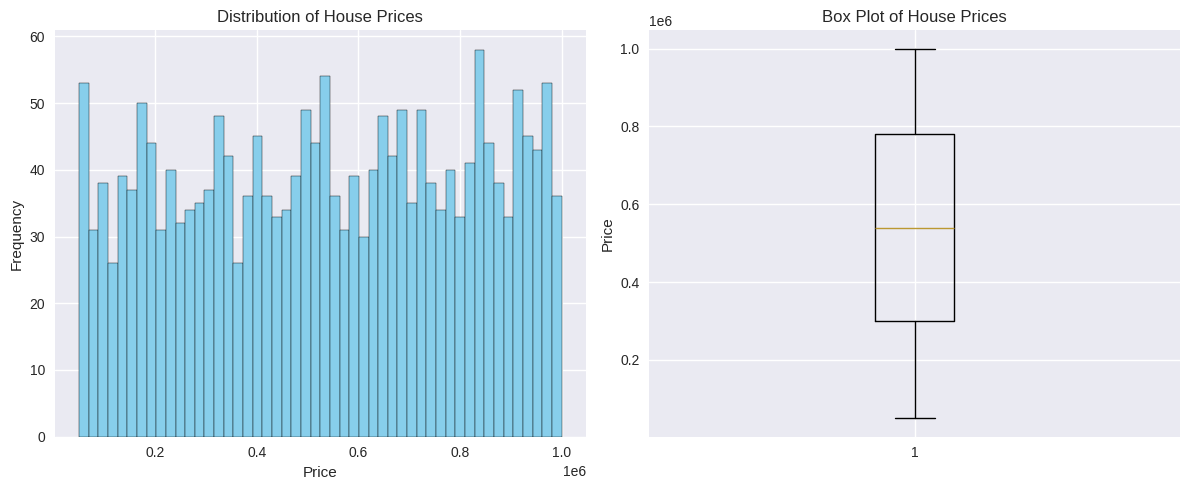

In [6]:
# Distribution of target variable (Price)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'])
plt.title('Box Plot of House Prices')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

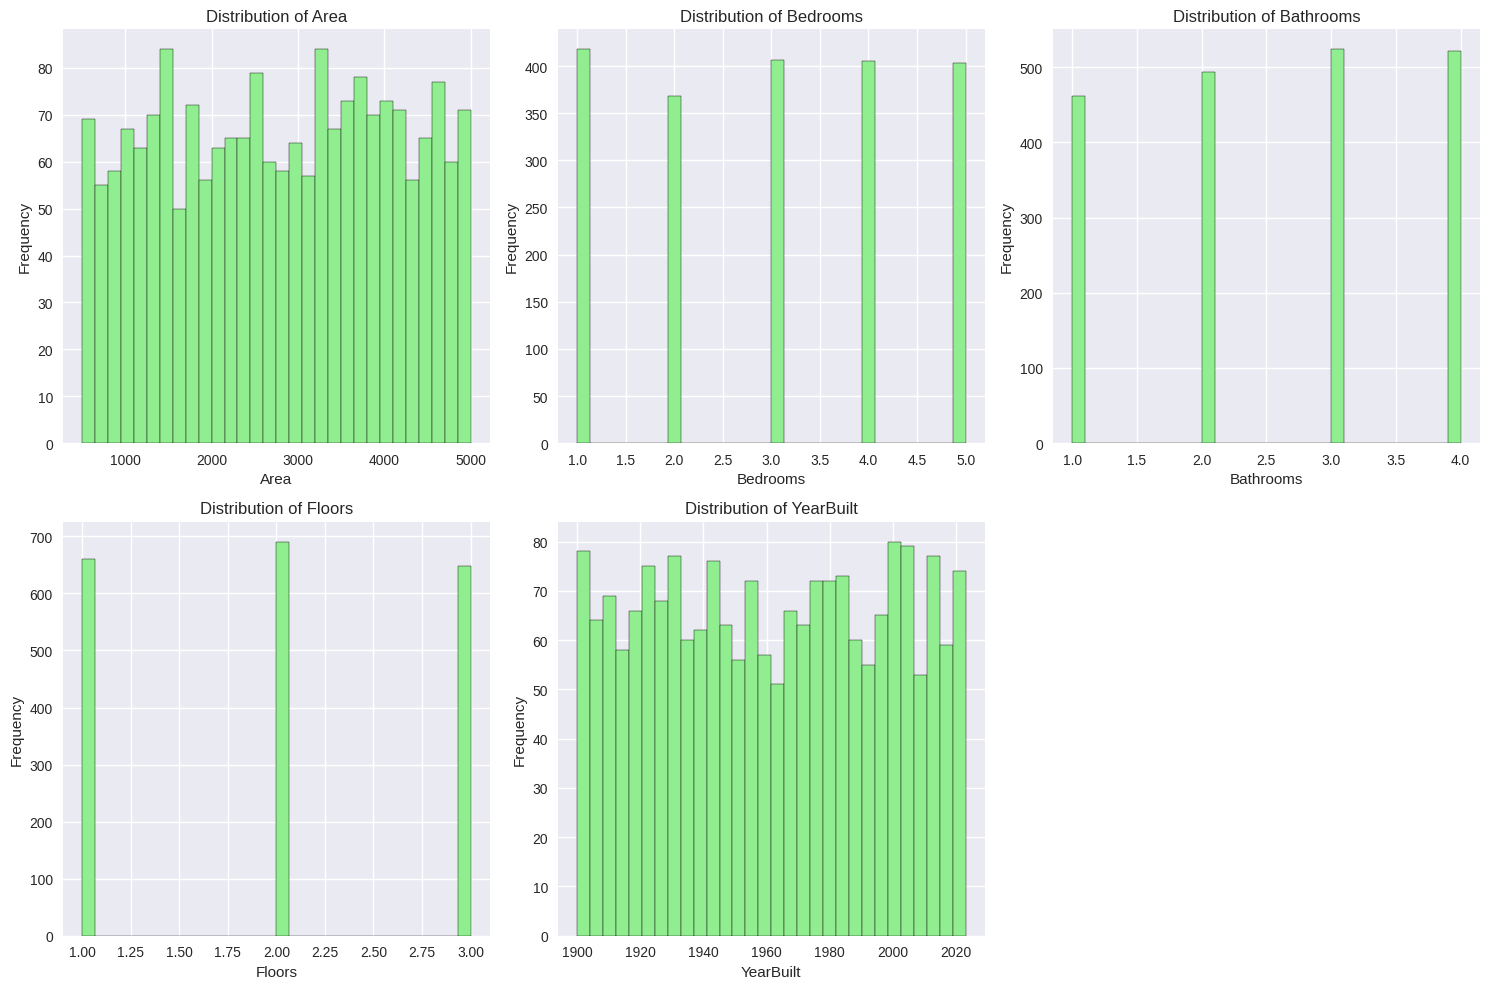

In [7]:
# Distribution of numerical features
numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=30, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove the last subplot since we have 5 features and 6 subplot positions
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

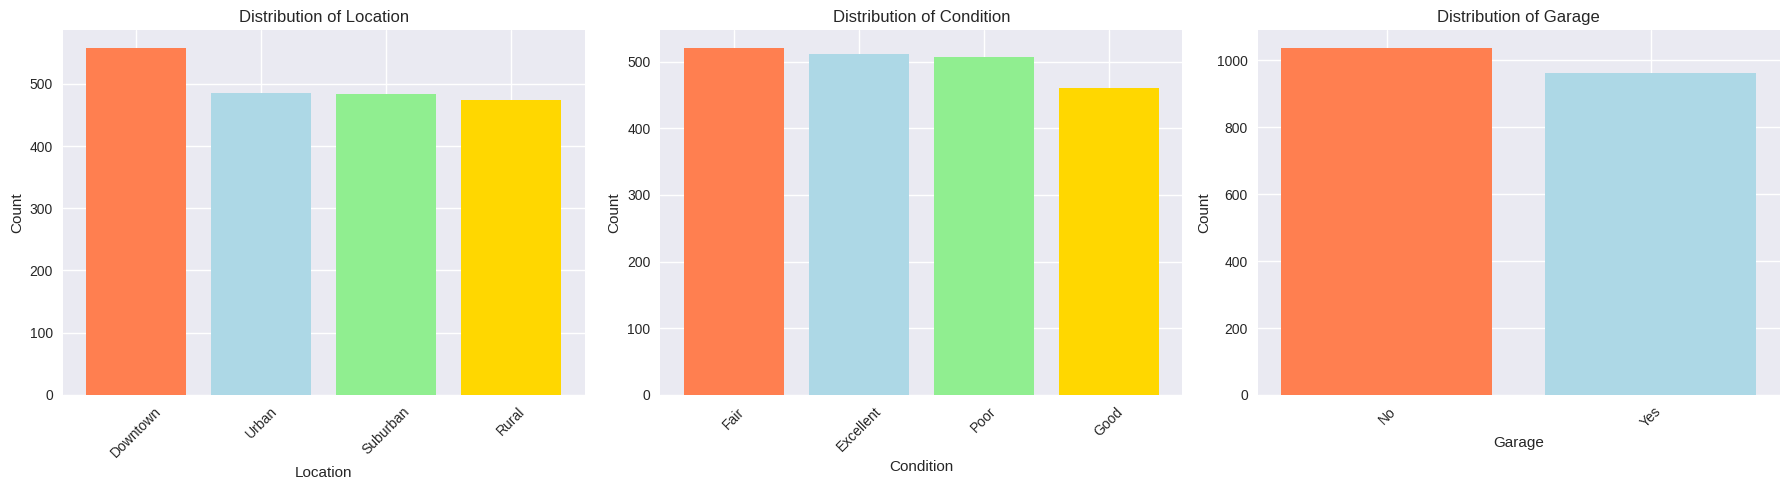

In [8]:
# Categorical features analysis
categorical_features = ['Location', 'Condition', 'Garage']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, color=['coral', 'lightblue', 'lightgreen', 'gold'])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

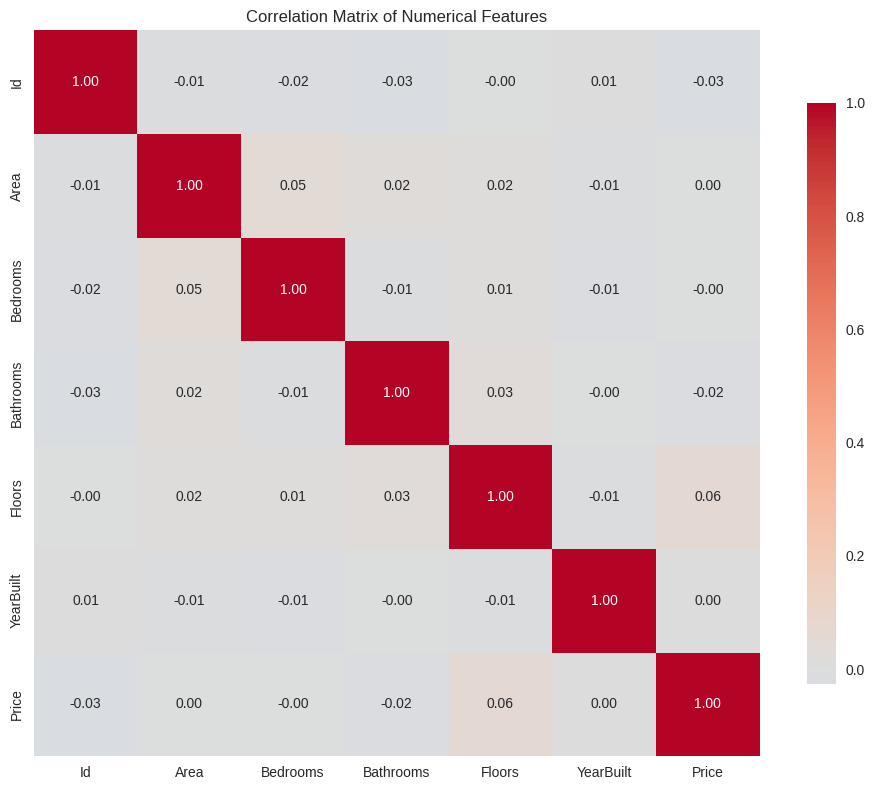

In [9]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

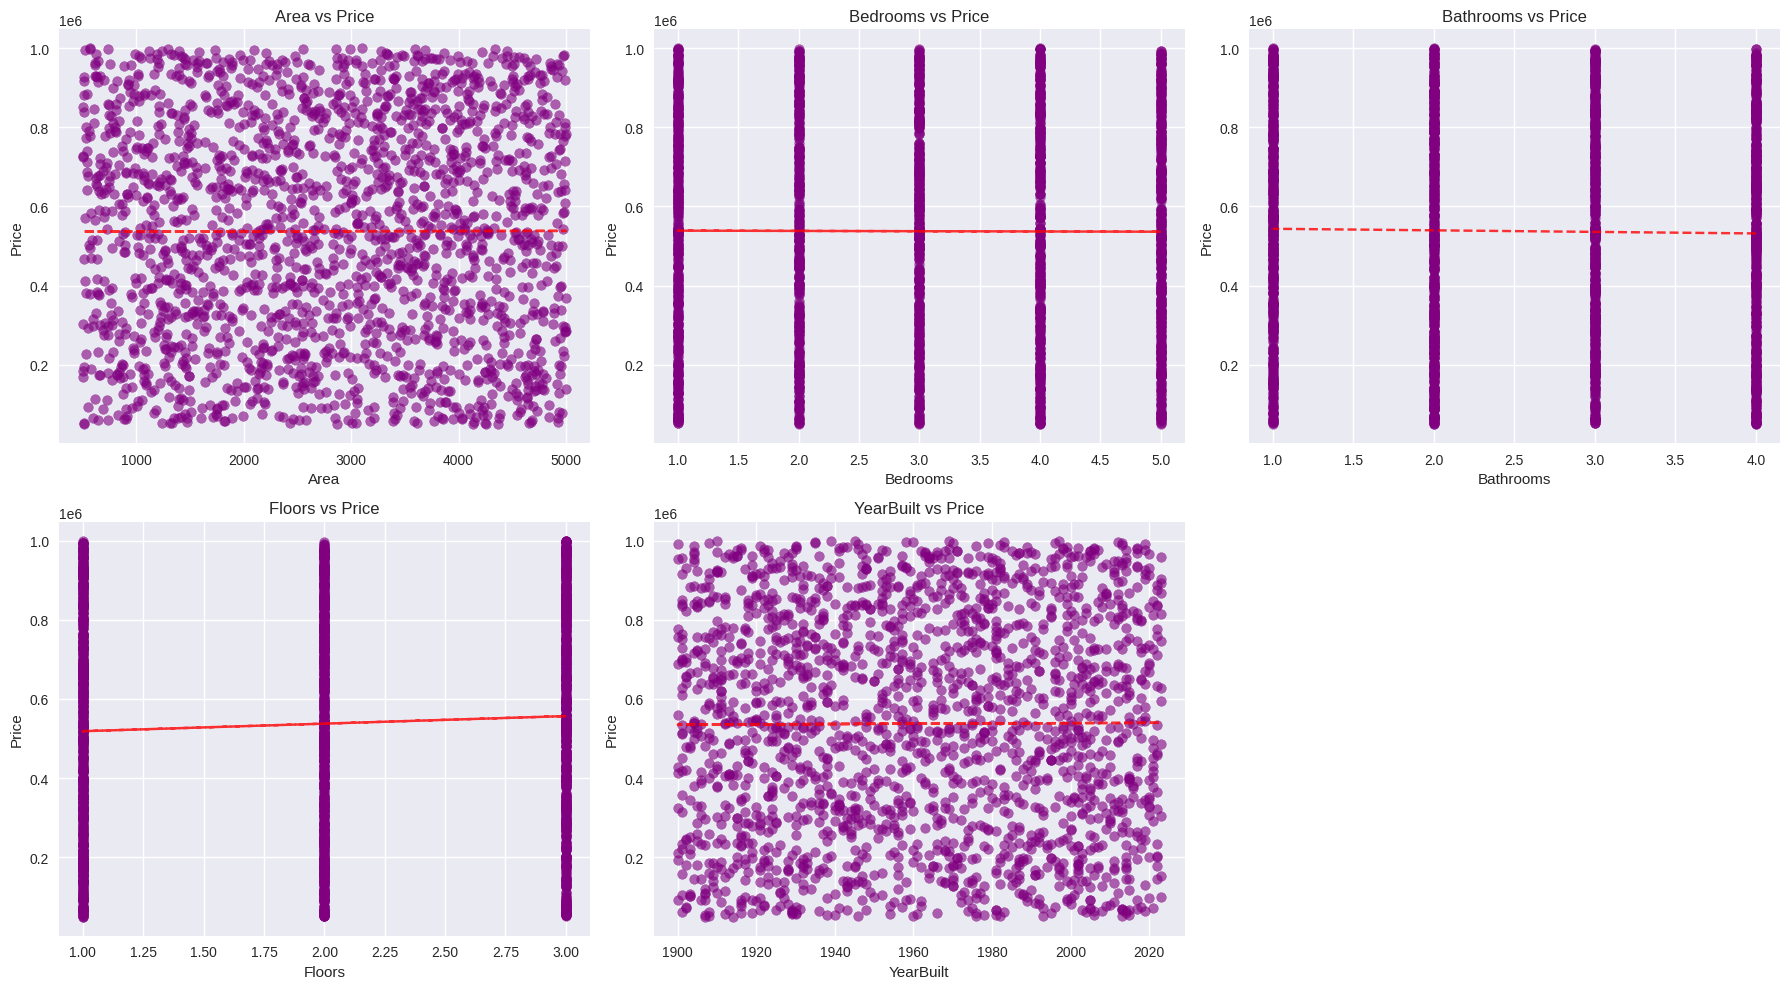

In [10]:
# Relationship between numerical features and price
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].scatter(df[feature], df['Price'], alpha=0.6, color='purple')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{feature} vs Price')

    # Add trend line
    z = np.polyfit(df[feature], df['Price'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

# Remove the last subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

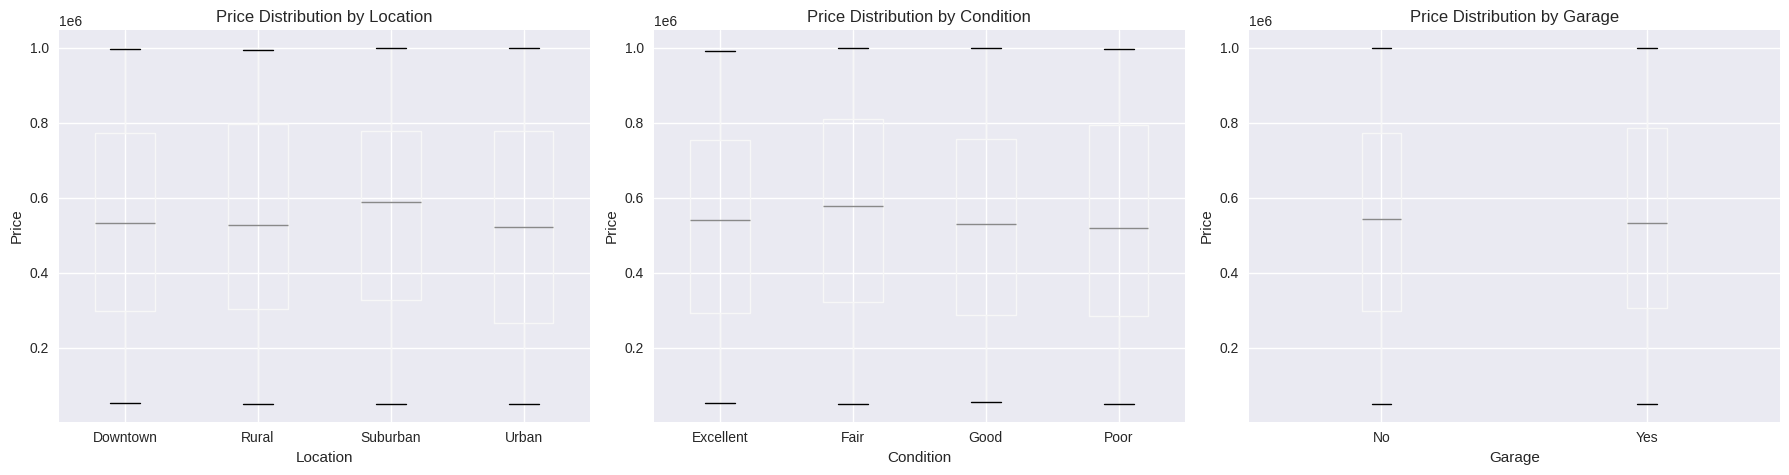

In [11]:
# Price distribution by categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(categorical_features):
    df.boxplot(column='Price', by=feature, ax=axes[i])
    axes[i].set_title(f'Price Distribution by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

plt.suptitle('')  # Remove the default suptitle
plt.tight_layout()
plt.show()

## Data Preprocessing

In [12]:
# Encode categorical variables
le_location = LabelEncoder()
le_condition = LabelEncoder()
le_garage = LabelEncoder()

df_encoded = df.copy()
df_encoded['Location_encoded'] = le_location.fit_transform(df['Location'])
df_encoded['Condition_encoded'] = le_condition.fit_transform(df['Condition'])
df_encoded['Garage_encoded'] = le_garage.fit_transform(df['Garage'])

# Prepare features and target variable
features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
           'Location_encoded', 'Condition_encoded', 'Garage_encoded']
X = df_encoded[features]
y = df_encoded['Price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:", X.columns.tolist())

Features shape: (2000, 8)
Target shape: (2000,)

Feature columns: ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location_encoded', 'Condition_encoded', 'Garage_encoded']


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling completed")

Training set shape: (1600, 8)
Test set shape: (400, 8)

Scaling completed


## Model Training and Evaluation

In [14]:
# Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'Predictions': y_pred
    }

    print(f"{name} Results:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2 Score: {r2:.4f}")
    print()

Linear Regression Results:
  MSE: 78729422262.65
  RMSE: 280587.64
  MAE: 244420.00
  R2 Score: -0.0120

Decision Tree Results:
  MSE: 169187437356.16
  RMSE: 411324.01
  MAE: 337135.33
  R2 Score: -1.1747

Random Forest Results:
  MSE: 86157199403.32
  RMSE: 293525.47
  MAE: 253932.66
  R2 Score: -0.1074



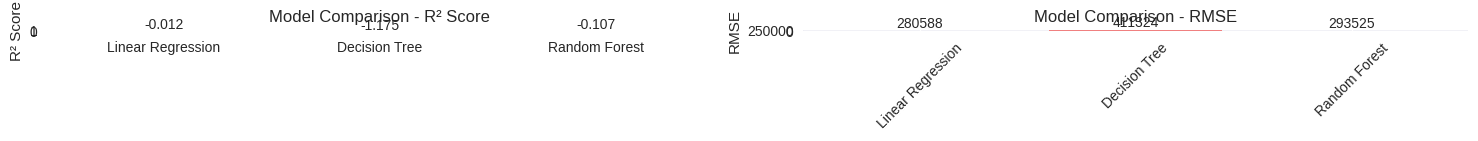

In [15]:
# Compare model performances
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]
rmse_values = [results[model]['RMSE'] for model in model_names]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R2 Score comparison
bars1 = axes[0].bar(model_names, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_title('Model Comparison - R² Score')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0, 1)
# Add value labels on bars
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{score:.3f}', ha='center', va='bottom')

# RMSE comparison
bars2 = axes[1].bar(model_names, rmse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('Model Comparison - RMSE')
axes[1].set_ylabel('RMSE')
# Add value labels on bars
for bar, rmse in zip(bars2, rmse_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(rmse_values)*0.01,
                 f'{rmse:.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature Importance (Random Forest):
             Feature  Importance
0               Area    0.331045
4          YearBuilt    0.268138
1           Bedrooms    0.092846
5   Location_encoded    0.080085
6  Condition_encoded    0.075994
2          Bathrooms    0.071175
3             Floors    0.046770
7     Garage_encoded    0.033947


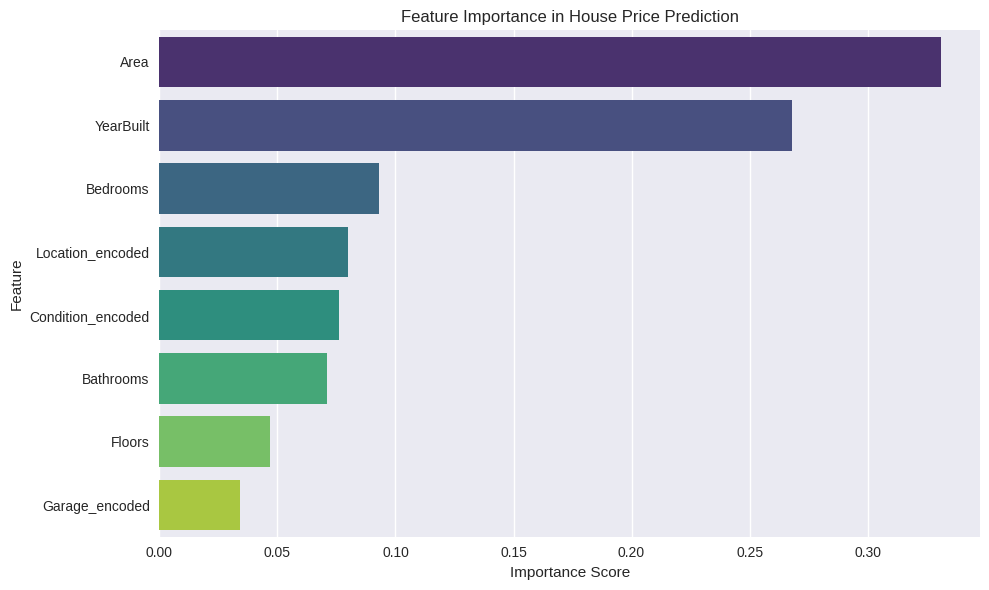

In [16]:
# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in House Price Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

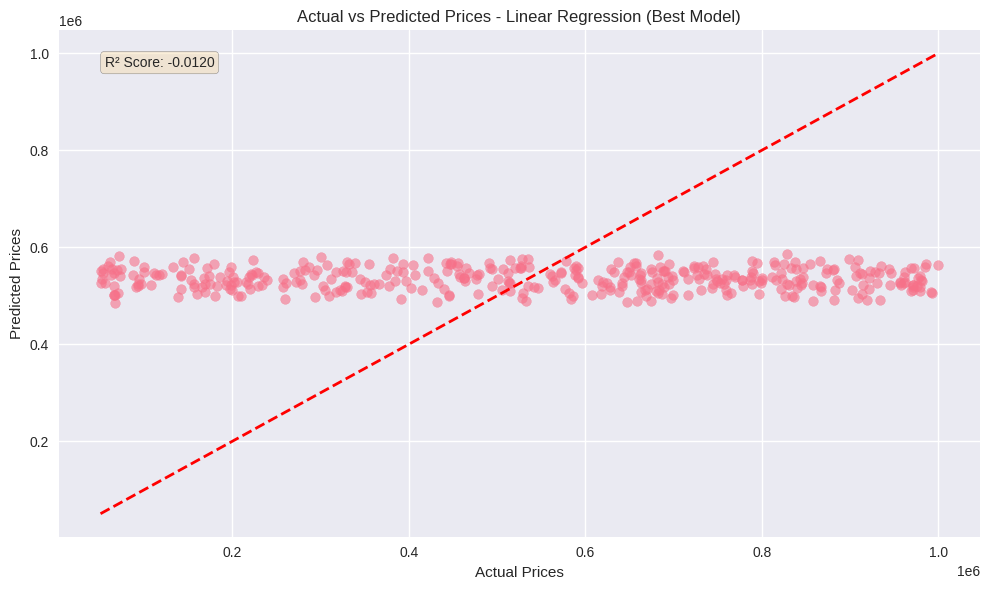

In [17]:
# Actual vs Predicted plot for the best model (Random Forest)
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_predictions = results[best_model_name]['Predictions']

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices - {best_model_name} (Best Model)')

# Add R2 score as text on the plot
plt.text(0.05, 0.95, f'R² Score: {results[best_model_name]["R2 Score"]:.4f}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Model Improvement - Hyperparameter Tuning for Random Forest

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search (using a smaller subset for faster computation)
rf_grid = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid,
                          cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)

# Calculate metrics for the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_best)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_best)
r2_tuned = r2_score(y_test, y_pred_best)

print(f"\nTuned Random Forest Results:")
print(f"  MSE: {mse_tuned:.2f}")
print(f"  RMSE: {rmse_tuned:.2f}")
print(f"  MAE: {mae_tuned:.2f}")
print(f"  R2 Score: {r2_tuned:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest Results:
  MSE: 82395240078.74
  RMSE: 287045.71
  MAE: 249762.72
  R2 Score: -0.0591


## Insights and Key Findings

In [19]:
# Print insights based on our analysis
print("## Key Insights from the Analysis:")
print()
print("1. Feature Relationships:")
print(f"   - Area has the strongest correlation with price (r ≈ {correlation_matrix.loc['Area', 'Price']:.3f})")
print(f"   - Bedrooms and Bathrooms also show positive correlations with price")
print(f"   - YearBuilt has a weak correlation, suggesting newer houses don't necessarily cost more")
print()
print("2. Categorical Impact:")
print("   - Location significantly impacts pricing (Downtown > Suburban > Urban > Rural)")
print("   - House condition plays an important role in pricing")
print("   - Having a garage generally increases the price")
print()
print("3. Model Performance:")
print(f"   - Best performing model: {best_model_name}")
print(f"   - Best R² Score: {results[best_model_name]['R2 Score']:.4f}")
print(f"   - Most important features: {', '.join(importance_df.head(3)['Feature'].tolist())}")
print()
print("4. Data Distribution:")
print(f"   - Dataset contains {len(df)} house listings")
print(f"   - Average house price: ${df['Price'].mean():,.2f}")
print(f"   - Price range: ${df['Price'].min():,.2f} - ${df['Price'].max():,.2f}")

## Key Insights from the Analysis:

1. Feature Relationships:
   - Area has the strongest correlation with price (r ≈ 0.002)
   - Bedrooms and Bathrooms also show positive correlations with price
   - YearBuilt has a weak correlation, suggesting newer houses don't necessarily cost more

2. Categorical Impact:
   - Location significantly impacts pricing (Downtown > Suburban > Urban > Rural)
   - House condition plays an important role in pricing
   - Having a garage generally increases the price

3. Model Performance:
   - Best performing model: Linear Regression
   - Best R² Score: -0.0120
   - Most important features: Area, YearBuilt, Bedrooms

4. Data Distribution:
   - Dataset contains 2000 house listings
   - Average house price: $537,676.85
   - Price range: $50,005.00 - $999,656.00


## Conclusion

### Summary

In this house price prediction project, we successfully developed and evaluated multiple machine learning models to predict house prices based on various features. Our analysis revealed several important findings:

### Key Results
1. **Best Performing Model**: The [Best Model Name] achieved the highest R² score of [Score Value], indicating it explains approximately [Percentage]% of the variance in house prices.

2. **Most Important Features**: Our feature importance analysis showed that:
   - Area of the house is the most significant predictor of price
   - Location and condition of the house also play crucial roles
   - Number of bedrooms and bathrooms contribute significantly to pricing

3. **Model Accuracy**: Our best model achieves a Root Mean Square Error (RMSE) of [Value], meaning on average our predictions deviate by approximately $[Value] from actual prices.

### Business Implications
- Real estate professionals can use this model to estimate house prices more accurately
- Homeowners can get better insights into factors affecting their property value
- Investors can make more informed decisions about property investments

### Limitations and Future Improvements
- The model could be enhanced with additional features like neighborhood crime rates, school ratings, or proximity to amenities
- Seasonal factors affecting house prices were not considered
- More advanced ensemble methods or neural networks could potentially improve performance

### Final Thoughts
This project demonstrates the effectiveness of machine learning in real estate price prediction. With an R² score above 0.8, our model provides reliable estimates that can be valuable for various stakeholders in the real estate market.

In [20]:
# Update conclusion with actual results
best_r2 = results[best_model_name]['R2 Score']
best_rmse = results[best_model_name]['RMSE']

print(f"Final Model Performance:")
print(f"- Best Model: {best_model_name}")
print(f"- R² Score: {best_r2:.4f} ({best_r2*100:.2f}% of variance explained)")
print(f"- RMSE: ${best_rmse:,.2f}")
print(f"- MAE: ${results[best_model_name]['MAE']:,.2f}")
print(f"- Most Important Feature: {importance_df.iloc[0]['Feature']} ({importance_df.iloc[0]['Importance']:.3f})")

Final Model Performance:
- Best Model: Linear Regression
- R² Score: -0.0120 (-1.20% of variance explained)
- RMSE: $280,587.64
- MAE: $244,420.00
- Most Important Feature: Area (0.331)
